# Representación gráfica de la solución

## 1. ¿Cómo se mueve un péndulo? 


> Se dice que un sistema cualquiera, mecánico, eléctrico, neumático, etc., es un oscilador armónico si, cuando se deja en libertad fuera de su posición de equilibrio, vuelve hacia ella describiendo oscilaciones sinusoidales, o sinusoidales amortiguadas en torno a dicha posición estable.
- https://es.wikipedia.org/wiki/Oscilador_armónico

**Referencias**: 
   - http://matplotlib.org
   - https://seaborn.pydata.org
   - http://www.numpy.org
   - http://ipywidgets.readthedocs.io/en/latest/index.html
   
**En realidad esto es el estudio de oscilaciones.**
___
 <div>
<img style="float: left; margin: 0px 0px 15px 15px;" src="https://upload.wikimedia.org/wikipedia/commons/thumb/4/4c/Wide_Field_Imager_view_of_a_Milky_Way_look-alike_NGC_6744.jpg/712px-Wide_Field_Imager_view_of_a_Milky_Way_look-alike_NGC_6744.jpg" width="400px" height="100px" />
 </div>

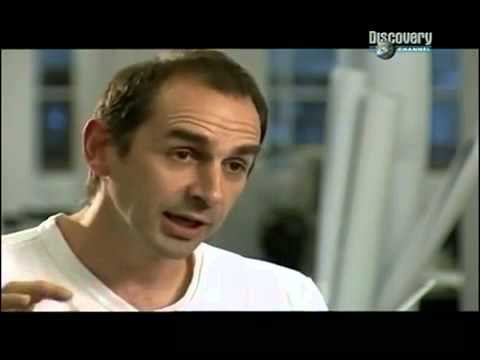

In [1]:
from IPython.display import YouTubeVideo
YouTubeVideo('k5yTVHr6V14')

Los sistemas mas sencillos a estudiar en oscilaciones son el sistema masa-resorte y el péndulo simple.

<div>
<img style="float: left; margin: 0px 0px 15px 15px;" src="https://upload.wikimedia.org/wikipedia/commons/7/76/Pendulum.jpg" width="210px" height="70px" />
<img style="float: right; margin: 15px 15px 15px 15px;" src="https://upload.wikimedia.org/wikipedia/ko/9/9f/Mass_spring.png" width="260px" height="120px" />
</div>

\begin{align}
\frac{d^2 x}{dt^2} +  \omega_{0}^2 x &= 0, \quad\mbox{donde} \quad \omega_{0} = \sqrt{\frac{k}{m}}\notag\\
\frac{d^2 \theta}{dt^2} + \omega_{0}^{2}\, \theta &= 0, \quad\mbox{donde}\quad \omega_{0}^2 = \frac{g}{l} 
\end{align} 

## Solución en el tiempo
El modelo del sistema `masa-resorte` está descrito por la siguiente **ecuación diferencial**:

\begin{equation}
\frac{d^2x}{dt^2} + \frac{k}{m}x = 0,
\end{equation}

cuya solución se escribe como 
\begin{equation}
x(t) = A \cos(\omega_{o} t) + B \sin(\omega_{o} t)
\end{equation}
Y su primera derivada (velocidad) sería 
\begin{equation}
v(t) = \frac{dx(t)}{dt} = \omega_{0}[- A \sin(\omega_{0} t) + B\cos(\omega_{0}t)]
\end{equation}

**¿Cómo se ven las gráficas de $x$ vs $t$ y $\frac{dx}{dt}$ vs $t$?** 

In [2]:
import matplotlib.pyplot as plt
import numpy as np

In [3]:
def x(t,w0=1):
    A=1
    B=1
    return A*np.cos(w0*t)+B*np.sin(w0*t)
def v(t,w0=1):
    A=1
    B=1
    return w0*(-A*np.sin(w0*t)+B*np.cos(w0*t))

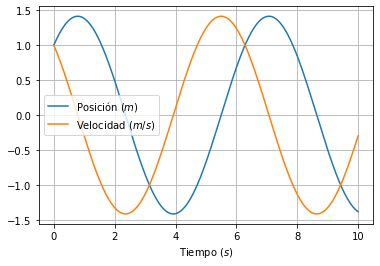

In [6]:
t=np.linspace(0,10,500)
plt.plot(t,x(t),label='Posición ($m$)')
plt.plot(t,v(t),label='Velocidad ($m/s$)')
plt.xlabel('Tiempo ($s$)')
plt.legend()
plt.grid()

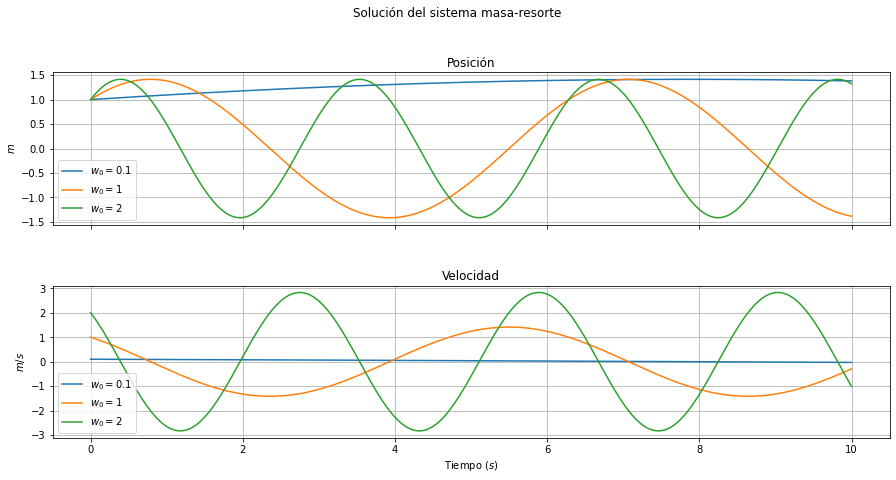

In [21]:
# Graficando múltiples frecuencias
W=[0.1,1,2]
#fig,ax=plt.subplots(2,1) # Aumentamos el espacio entre subplots
fig=plt.figure(figsize=(15,7))
gs=fig.add_gridspec(2,1,hspace=0.4,top=0.85) # (No. de renglones, No. de columnas)
ax=gs.subplots()
fig.suptitle('Solución del sistema masa-resorte')
for w0 in W:
    ax[0].plot(t,x(t,w0),label='$w_0={}$'.format(w0))
    ax[1].plot(t,v(t,w0),label='$w_0={}$'.format(w0))
#ax[0].set_title('Posición')
#ax[1].set_title('Velocidad')
ax[0].set(title='Posición',ylabel='$m$')
ax[1].set(title='Velocidad',ylabel='$m/s$',xlabel='Tiempo ($s$)')
for axes in ax:
    axes.label_outer() # Para que unicaménte muestre las etiquetas externas
    axes.legend()
    axes.grid()

In [22]:
import matplotlib as mpl

In [25]:
# mpl.defaultParams # Mucho cuidado acá

**Plano de fase**

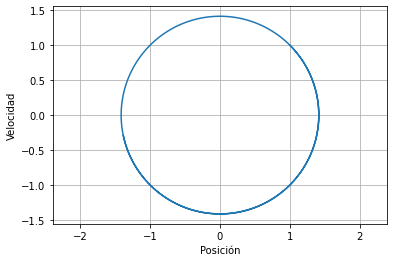

In [28]:
plt.plot(x(t),v(t))
plt.axis('equal')
plt.xlabel('Posición')
plt.ylabel('Velocidad')
plt.grid()

Y si consideramos un conjunto de frecuencias de oscilación, entonces

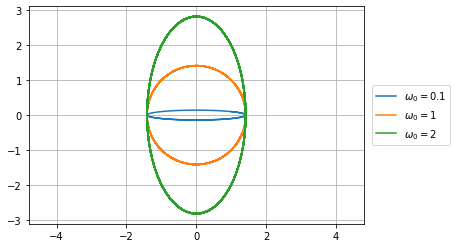

In [36]:
W=[0.1,1,2]
t=np.linspace(0,100,1000)
for w0 in W:
    plt.plot(x(t,w0),v(t,w0),label='$\omega_0={}$'.format(w0))
#plt.legend(loc='center right')
''' Opciones de posicionamiento
best
upper right
upper left
lower left
lower right
right
center left
center right
lower center
upper center
center
'''
plt.legend(loc='center left',bbox_to_anchor=(1.01,0.5))

plt.axis('equal')
plt.grid()

Trayectorias del oscilador armónico simple en el espacio fase $(x,\, \dot{x})$.

## Gráfico interactivo
La posición y velocidad para el sistema `masa-resorte` se escriben como: 
\begin{align}
x(t) &= x(0) \cos(\omega_{0} t) + \frac{\dot{x}(0)}{\omega_{0}} \sin(\omega_{0} t)\\
\dot{x}(t) &= -\omega_{0}x(0) \sin(\omega_{0} t) + \dot{x}(0)\cos(\omega_{0}t)
\end{align}

Importemos la clase `interact` e `interact_manual`

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [16]:
def x(t,w0,x0,v0):
    return x0*np.cos(w0*t)+v0/w0*np.sin(w0*t)
def v(t,w0,x0,v0):
    return -w0*x0*np.sin(w0*t)+v0*np.cos(w0*t)

In [3]:
from ipywidgets import *

In [4]:
interact?

In [7]:
# interact como función
t=np.linspace(0,10,500)
def grafico(w0=0.1,x0=1,v0=0):
    plt.plot(t,x(t,w0,x0,v0))
    plt.ylim([-2,2])
    plt.title('Posición')
    plt.xlabel('Tiempo ($s$)')
    plt.ylabel('$m$')
    plt.grid()
interact(grafico,w0=(0.1,2,0.1),x0=(-2,2),v0=fixed(0))

interactive(children=(FloatSlider(value=0.1, description='w0', max=2.0, min=0.1), IntSlider(value=1, descripti…

<function __main__.grafico(w0=0.1, x0=1, v0=0)>

In [9]:
# interact como decorador
@interact_manual(w0=(0.1,2,0.1),x0=(-2,2),v0=fixed(0))
def grafico(w0=0.1,x0=1,v0=0):
    plt.plot(t,x(t,w0,x0,v0))
    plt.ylim([-2,2])
    plt.title('Posición')
    plt.xlabel('Tiempo ($s$)')
    plt.ylabel('$m$')
    plt.grid()

interactive(children=(FloatSlider(value=0.1, description='w0', max=2.0, min=0.1), IntSlider(value=1, descripti…

**Actividad:** Crear un gráfico interactivo para variar la posición inicial $\dot x_0$ y la frecuencia fundamental $\omega_0$, para la velocidad del sistema `masa-resorte`.

In [13]:
t=np.linspace(0,20,500)
@interact(w0=(0.1,2,0.1),x0=(-2,2),v0=-1)
def graf(w0=1,x0=1,v0=0):
    plt.plot(t,v(t,w0,x0,v0))
    plt.title('Velocidad')
    plt.ylabel('$m/s$')
    plt.xlabel('Tiempo ($s$)')
    plt.ylim([-5,5])
    plt.grid()

interactive(children=(FloatSlider(value=1.0, description='w0', max=2.0, min=0.1), IntSlider(value=1, descripti…

## Animación
importemos ahora la función `FuncAnimation` del paquete `matplotlib.animation`

In [14]:
from matplotlib.animation import FuncAnimation

In [15]:
FuncAnimation?

**Animación del péndulo.**

La solución para el sistema reducido del `péndulo` es

\begin{align}
\theta(t) &= \theta(0) \cos(\omega_{0} t) + \frac{\dot{\theta}(0)}{\omega_{0}} \sin(\omega_{0} t)\\
\dot{\theta}(t) &= -\omega_{0}\theta(0) \sin(\omega_{0} t) + \dot{\theta}(0)\cos(\omega_{0}t),
\end{align}
donde $\omega_0=\sqrt{\dfrac{g}{l}}$.

Las posiciones $x$ y $y$ se obtienen de la descomposición entre la longitud y el ángulo:

\begin{align}
x &= l \sin(\theta), \quad
y = -l \cos(\theta) .
\end{align}

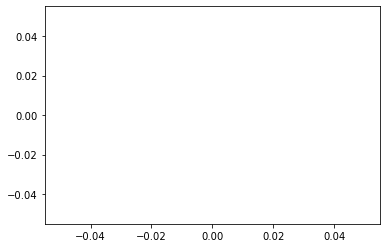

In [17]:
fig=plt.figure()
line,=plt.plot([],[]) # Con la coma (,) se pide una Tupla con un único elemento llamado 'line'
line # Este es el iterable que necesitamos

In [21]:
%matplotlib notebook

<IPython.core.display.Javascript object>


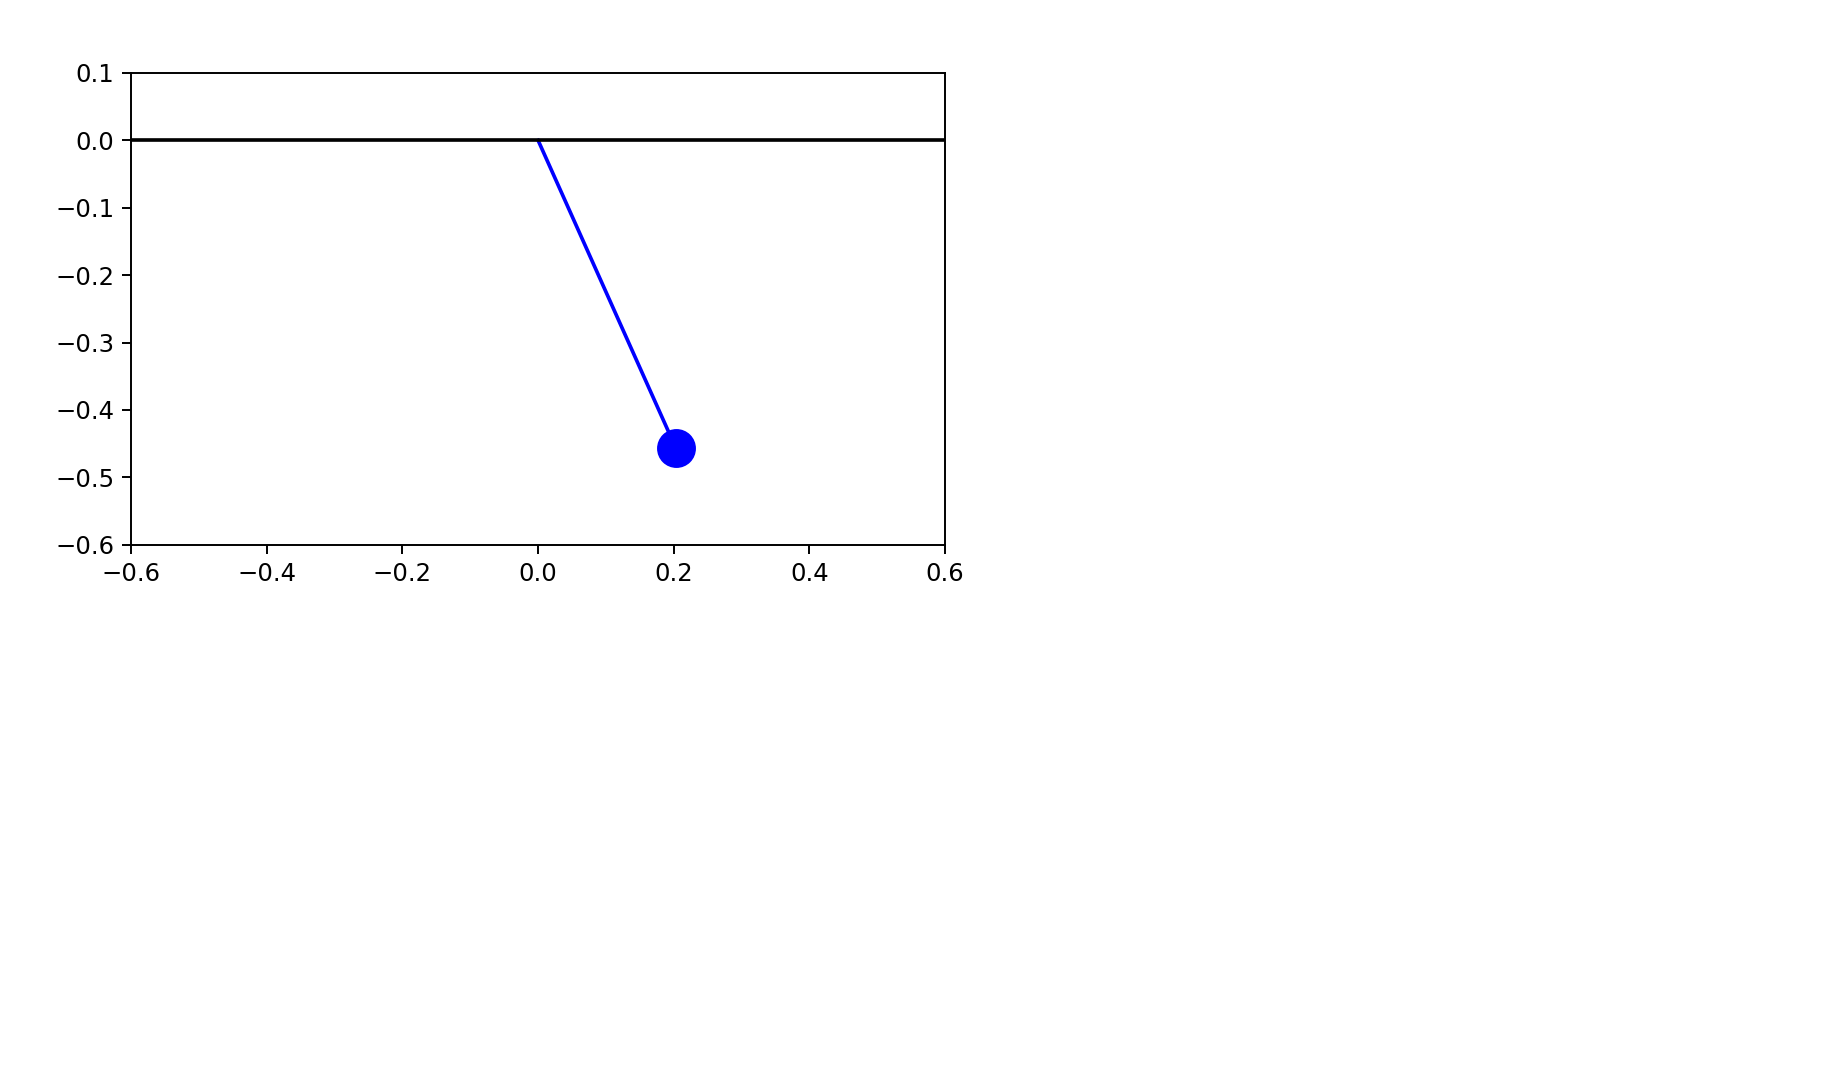

In [32]:
fig=plt.figure(figsize=(6,3.5))
g=9.8
def pendulo(t,L,th0):
    plt.cla()
    plt.axis([-L-0.1,L+0.1,-L-0.1,0.1])
    v0=0
    w0=np.sqrt(g/L)
    th=th0*np.cos(w0*t)+v0/w0*np.sin(w0*t)
    x=L*np.sin(th)
    y=-L*np.cos(th)
    line=plt.plot([0,x],[0,y],'b',[-L-0.1,L+0.1],[0,0],'k',x,y,'ob',ms=15)
    return line
t=np.linspace(0,20,200)
FuncAnimation(fig,pendulo,frames=t,fargs=(0.5,0.5),interval=100,repeat=False)

Animación del sitema masa-resorte

### Para el resorte
Conociendo la distancia total $D$ e imponiendo las dimensiones de cada ciclo, para $N$ ciclos, del resorte y de los extremos como $L$ y $d$, respectivamente; las distancias entre cada ciclo son:
$$
d_x=\frac{D-2d}{2N+2}
$$
y
$$
d_y=\frac{\sqrt{L^2-d_x^2}}{4}.
$$

#### Algoritmo
```
Entrada: D
Parámetros: N,L,d
Salidas: x,y
1. Se calcula dx
2. Se calcula dy
3. x=[0,d,d+0.5dx]
4. y=[0,0,dy]
5. da=d+0.5dx
loop (2N+1)
  6. da += dx
  7. dy *= -1
  8. agregar a x: da
  9. agregar a y: dy
endloop
10. agregar a x: da+0.5dx, da+0.5dx+d
11. agregar a y: 0,0
```

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

In [4]:
def resorte(D,N=0,L=1,d=0.1):
    dx=(D-2*d)/(2*N+2)
    dy=(L**2-dx**2)**0.5/4
    x=[0,d,d+0.5*dx]
    y=[0,0,dy]
    da=d+0.5*dx
    for i in range(2*N+1):
        da += dx
        dy *= -1
        x.append(da)
        y.append(dy)
    x.append(da+0.5*dx)
    x.append(da+0.5*dx+d)
    y.append(0)
    y.append(0)
    return np.array(x),np.array(y)

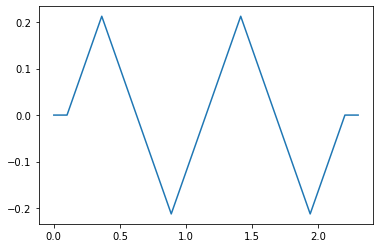

In [11]:
D=2.3
x,y=resorte(D,N=1)
plt.plot(x,y)

In [14]:
%matplotlib notebook

<IPython.core.display.Javascript object>


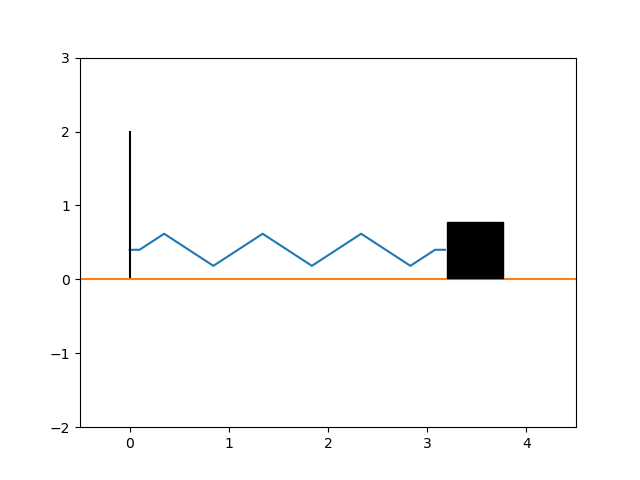

In [19]:
t=np.linspace(0,10,100)

fig=plt.figure()
k=10
offset=2.5
def masaResorte(t,m,x0):
    plt.cla()
    plt.axis([-0.5,4.5,-2,3])
    w0=np.sqrt(k/m)
    y=0.4
    D=x(t,w0,x0,0)+offset
    xr,yr=resorte(D-0.3,N=2)
    line=plt.plot(xr,yr+y,[0,0],[0,2],'k',[-0.5,4.5],[0,0],D,y,'sk',ms=40)
    return line
FuncAnimation(fig,masaResorte,frames=t,fargs=(1,1),interval=100,repeat=False)